In [1]:
import math
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import datetime
from collections import defaultdict
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('D://Documenti//Università//Informatica Umanistica//DMII//occupancy_data//datatraining.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)

In [2]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
columns2remove = ['HumidityRatio','date','Occupancy',]
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2
1,23.18,27.2720,426.0,721.25
2,23.15,27.2675,429.5,714.00
3,23.15,27.2450,426.0,713.50
4,23.15,27.2000,426.0,708.25
5,23.10,27.2000,426.0,704.50


In [4]:
dfVal = pd.read_csv('D://Documenti//Università//Informatica Umanistica//DMII//occupancy_data//datatest2.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)

In [5]:
dfVal.drop(columns2remove, inplace=True, axis=1)
dfVal.head()

,Temperature,Humidity,Light,CO2
1,21.7600,31.133333,437.333333,1029.666667
2,21.7900,31.000000,437.333333,1000.000000
3,21.7675,31.122500,434.000000,1003.750000
4,21.7675,31.122500,439.000000,1009.500000
5,21.7900,31.133333,437.333333,1005.666667


Unisco i due dataset

In [6]:
df_conc=pd.concat([df,dfVal])

In [7]:
df_conc.shape

(17895, 4)

# Data Splitting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y_name = 'CO2'

attributes = [col for col in df.columns if col != y_name ]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Linear Regression 2 attribute

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Scelgo come attributi Light e Co2. Co2 Sarà l'attributo da predirre.

In [11]:
reg = LinearRegression()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y = mX + b
m = slope/coefficients, condiziona l'inclinazione della retta
b = intercepets 

In [12]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [1.03935537]
Intercept: 
 480.76526814014653


In [15]:
predizione = reg.predict(X_test.T[2].reshape(-1, 1))

In [16]:
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.466
MSE: 55862.152
MAE: 126.348


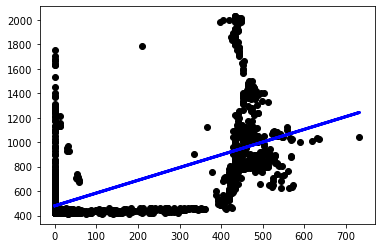

In [17]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], predizione, color='blue', linewidth=3)
plt.show()

### Lasso

In [18]:
reg = Lasso()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [1.03932917]
Intercept: 
 480.76841992715663


In [19]:
predizione = reg.predict(X_test.T[2].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.466
MSE: 55862.366
MAE: 126.350


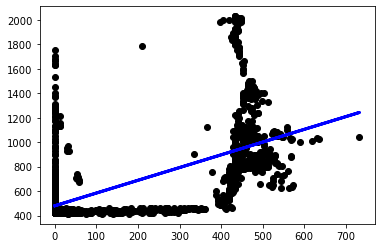

In [20]:
plt.scatter(X_test.T[2], y_test,  color='black')
plt.plot(X_test.T[2], predizione, color='blue', linewidth=3)
plt.show()

### Ridge

In [21]:
reg = Ridge()
reg.fit(X_train.T[2].reshape(-1, 1), y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [1.03935536]
Intercept: 
 480.7652687148502


In [22]:
predizione = reg.predict(X_test.T[2].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.466
MSE: 55862.152
MAE: 126.348


# Multiple linear regression

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [113.46309152  26.82286466   0.64727252]
Intercept: 
 -2501.793557383555


In [25]:
predizione = reg.predict(X_test)

In [26]:
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.691
MSE: 32309.317
MAE: 131.247


### Lasso

In [27]:
reg = Lasso()
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [111.69064843  26.73617304   0.65318937]
Intercept: 
 -2463.7251805143483


In [28]:
predizione = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.692
MSE: 32295.666
MAE: 130.996


### Ridge

In [30]:
reg = Ridge()
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [110.86469318  26.94983353   0.66648918]
Intercept: 
 -2452.5003464959814


In [30]:
predizione = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, predizione))
print('MSE: %.3f' % mean_squared_error(y_test, predizione))
print('MAE: %.3f' % mean_absolute_error(y_test, predizione))

R2: 0.692
MSE: 32295.666
MAE: 130.996
